Para este Analasis Exploratorio de Datos contaremos con los datos completos luego de haber realizado el merge de los 3 dataframes presentes en el ETL (games_and_reviews.csv) y también con el dataframe acotado a 3000 filas que se utilizó para el deploy de la api a travez de render.com (games_and_reviews_sample.csv) 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
data_acotada=pd.read_csv("../games_and_reviews_sample.csv")
data_completa = pd.read_csv("../Dataset_ETL/games_and_reviews.csv")

HISTOGRAMA DE TIEMPO DE JUEGO

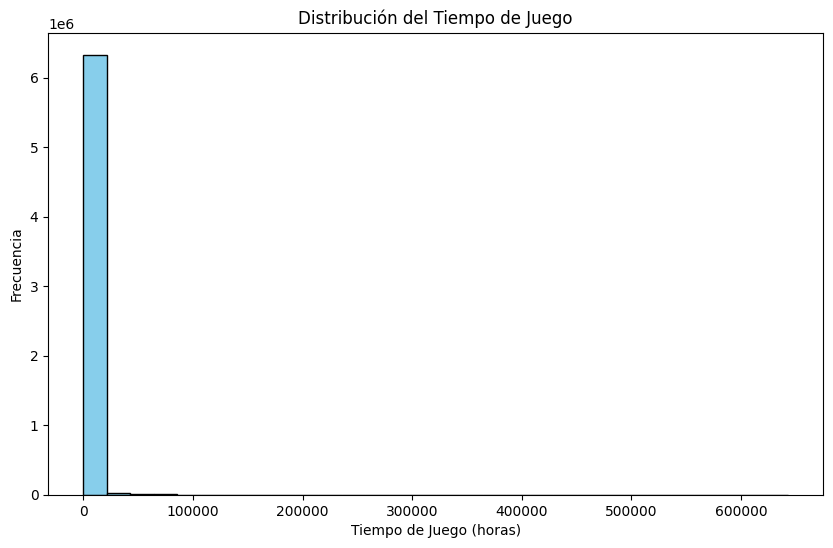

In [5]:
#para el dataframe completo:
plt.figure(figsize=(10, 6))
plt.hist(data_completa['playtime_forever'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución del Tiempo de Juego')
plt.xlabel('Tiempo de Juego (horas)')
plt.ylabel('Frecuencia')
plt.show()

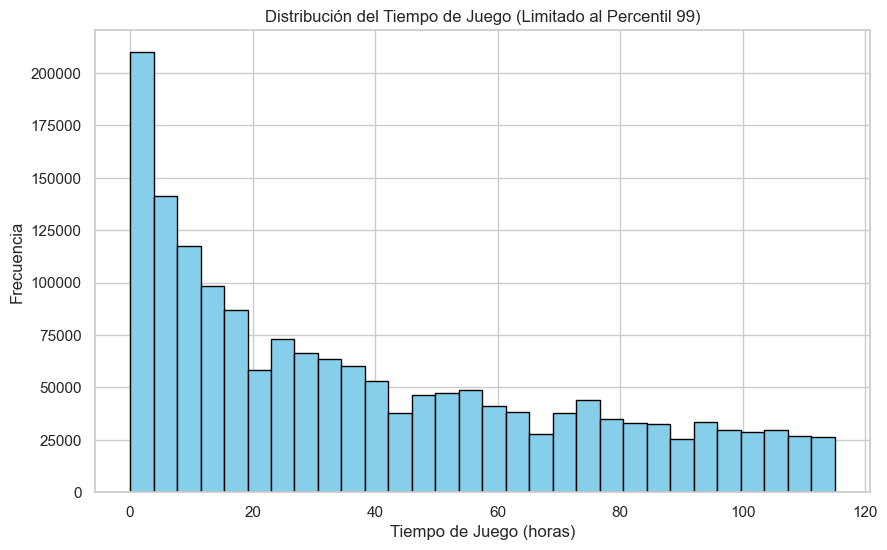

In [6]:
#como vemos que el grafico no es representativo debido a que posee muchos juegos con 0 o pocas horas jugadas
#graficamos solo aquellos juegos que tienen menos de 200000 de frecuencia  
sns.set(style="whitegrid")

#excluimos los juegos con 0 horas jugadas
df_non_zero = data_completa[data_completa['playtime_forever'] > 0]

#determinamos un límite superior para el eje x
#por ejemplo, usar el percentil 40 como límite máximo
x_max = df_non_zero['playtime_forever'].quantile(0.40)

#histograma de tiempo de juego
plt.figure(figsize=(10, 6))
plt.hist(df_non_zero['playtime_forever'], bins=30, range=(0, x_max), color='skyblue', edgecolor='black')
plt.title('Distribución del Tiempo de Juego (Limitado al Percentil 99)')
plt.xlabel('Tiempo de Juego (horas)')
plt.ylabel('Frecuencia')
plt.show()

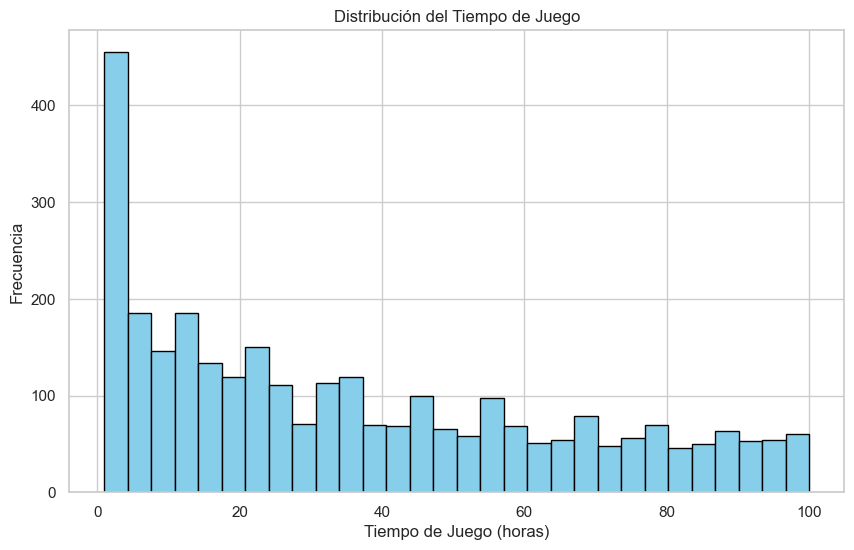

In [7]:
#para el dataframe acotado:
plt.figure(figsize=(10, 6))
plt.hist(data_acotada['playtime_forever'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución del Tiempo de Juego')
plt.xlabel('Tiempo de Juego (horas)')
plt.ylabel('Frecuencia')
plt.show()

TIEMPO DE JUEGO POR GENERO A LO LARGO DE LOS AÑOS

c:\Henry\Proyecto_MLOps\fastapi-env\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


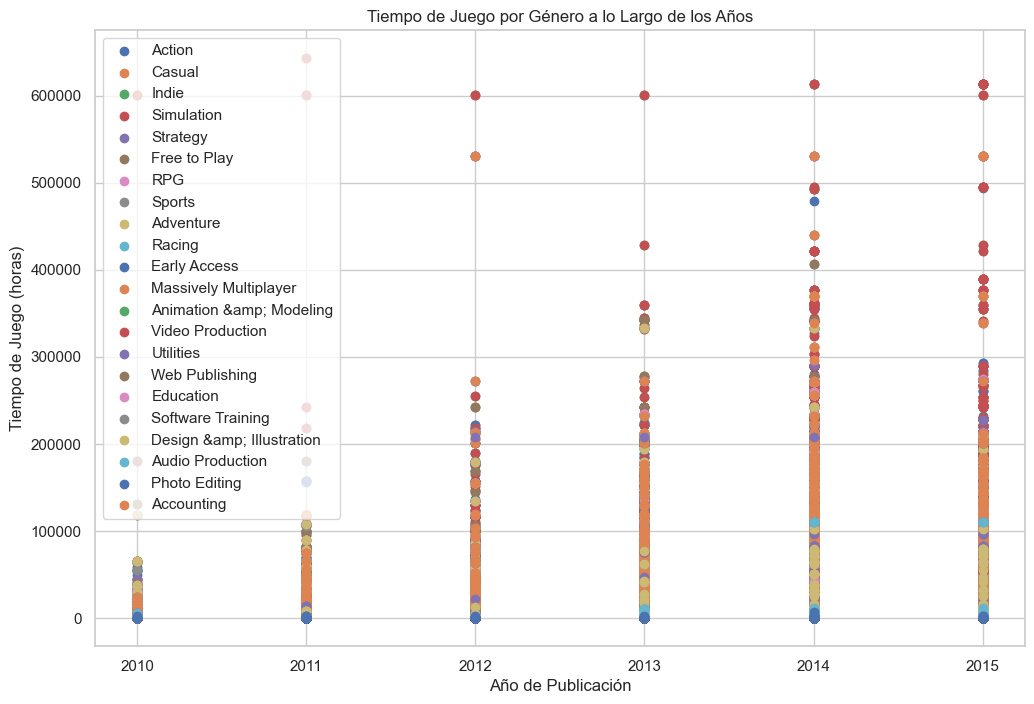

In [8]:
#para el dataframe completo:
generos = ["Action", "Casual", "Indie",	"Simulation", "Strategy", "Free to Play", "RPG", "Sports", "Adventure", "Racing","Early Access", "Massively Multiplayer", "Animation &amp; Modeling", "Video Production", "Utilities", "Web Publishing", "Education", "Software Training", "Design &amp; Illustration", "Audio Production", "Photo Editing", "Accounting"]

#preparamos los datos para el gráfico
data = pd.DataFrame()
for genero in generos:
    temp_df = data_completa[data_completa[genero] == 1].copy() 
    temp_df['Genre'] = genero
    data = pd.concat([data, temp_df])

#creamos un gráfico de dispersión
plt.figure(figsize=(12, 8))
for genero in generos:
    subset = data[data['Genre'] == genero]
    plt.scatter(subset['posted_year'], subset['playtime_forever'], label=genero)  

plt.legend()
plt.title('Tiempo de Juego por Género a lo Largo de los Años')
plt.xlabel('Año de Publicación')
plt.ylabel('Tiempo de Juego (horas)')
plt.show()

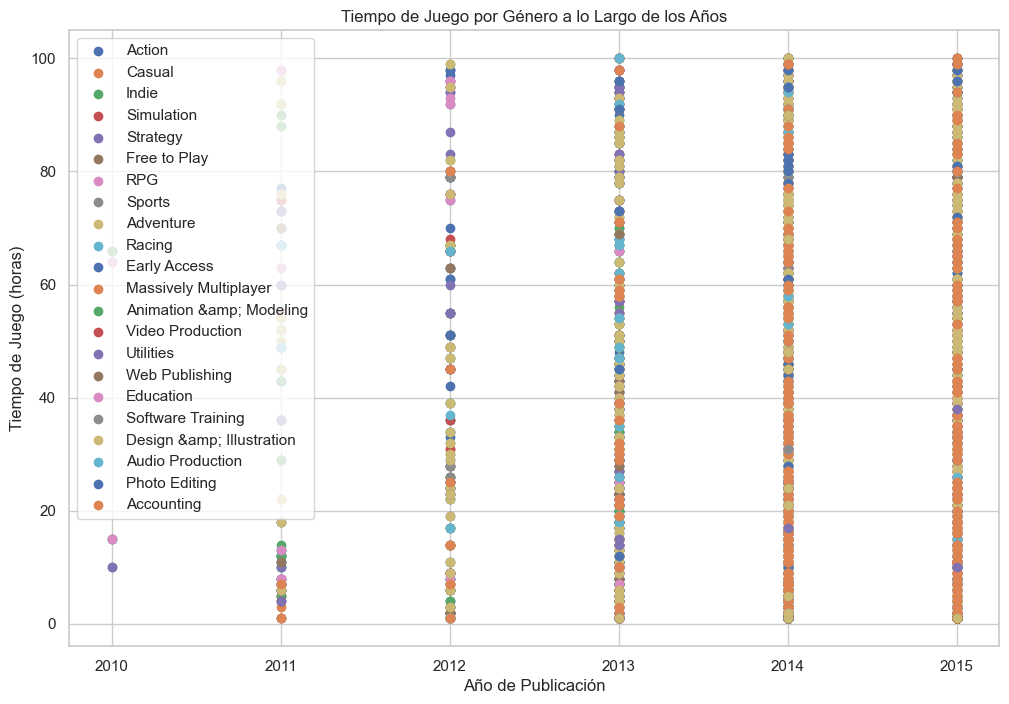

In [45]:
#para el dataframe acotado:
generos = ["Action", "Casual", "Indie",	"Simulation", "Strategy", "Free to Play", "RPG", "Sports", "Adventure", "Racing","Early Access", "Massively Multiplayer", "Animation &amp; Modeling", "Video Production", "Utilities", "Web Publishing", "Education", "Software Training", "Design &amp; Illustration", "Audio Production", "Photo Editing", "Accounting"]

#preparamos los datos para el gráfico
data = pd.DataFrame()
for genero in generos:
    temp_df = data_acotada[data_acotada[genero] == 1].copy() 
    temp_df['Genre'] = genero
    data = pd.concat([data, temp_df])

#creamos un gráfico de dispersión
plt.figure(figsize=(12, 8))
for genero in generos:
    subset = data[data['Genre'] == genero]
    plt.scatter(subset['posted_year'], subset['playtime_forever'], label=genero)  

plt.legend()
plt.title('Tiempo de Juego por Género a lo Largo de los Años')
plt.xlabel('Año de Publicación')
plt.ylabel('Tiempo de Juego (horas)')
plt.show()

JUEGOS PUBLICADOS POR AÑO

C:\Users\nico\AppData\Local\Temp\ipykernel_9548\3989849645.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='posted_year', data=data_completa, palette='viridis')


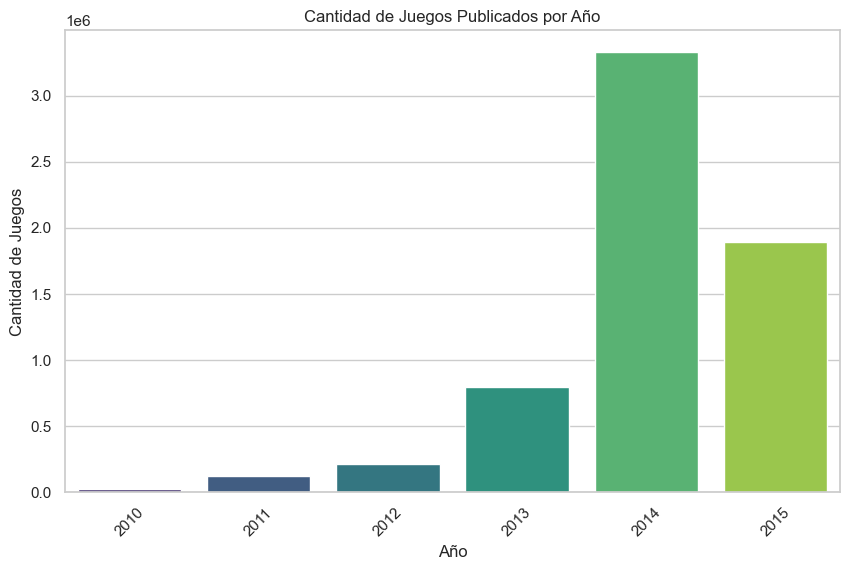

In [9]:

#para el dataframe completo
plt.figure(figsize=(10, 6))
sns.countplot(x='posted_year', data=data_completa, palette='viridis')
plt.title('Cantidad de Juegos Publicados por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.show()

C:\Users\nico\AppData\Local\Temp\ipykernel_9548\3817573242.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='posted_year', data=data_acotada, palette='viridis')


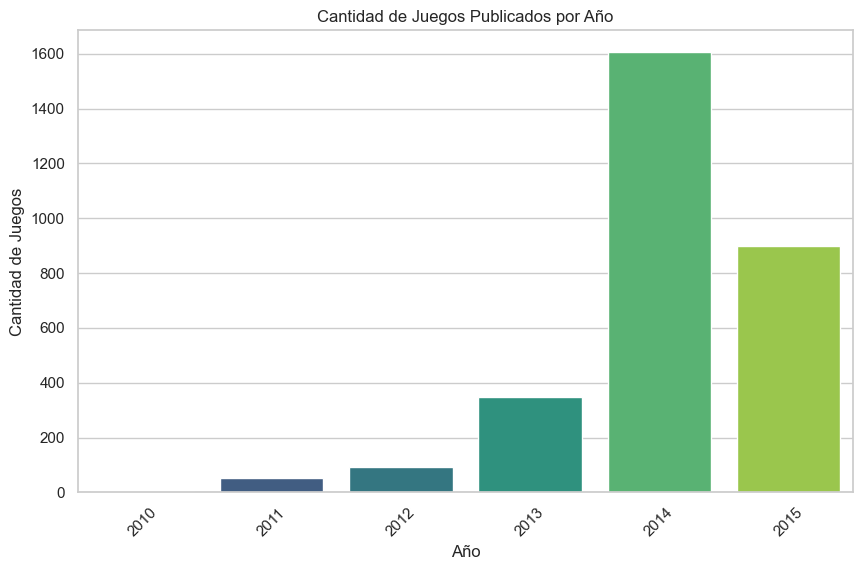

In [10]:
#para el dataframe acotado
plt.figure(figsize=(10, 6))
sns.countplot(x='posted_year', data=data_acotada, palette='viridis')
plt.title('Cantidad de Juegos Publicados por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.show()